In [9]:
import os
import sys

cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))

from sklearn.externals import joblib
from aye.fruit_detector import FruitDetector
from aye.fruit_tracker import FruitTracker
from aye.preprocessing import DataReader, rotate_image
from aye.blob_analysis import region_props, thresh_blobs_area
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [10]:
# Reader
reader = DataReader(rel_dir='images', ext='jpg')

# Detector
clf = joblib.load('../model/svc.pkl')
scaler = joblib.load('../model/scaler.pkl')
detector = FruitDetector(clf, scaler)

# Tracker
tracker = FruitTracker()

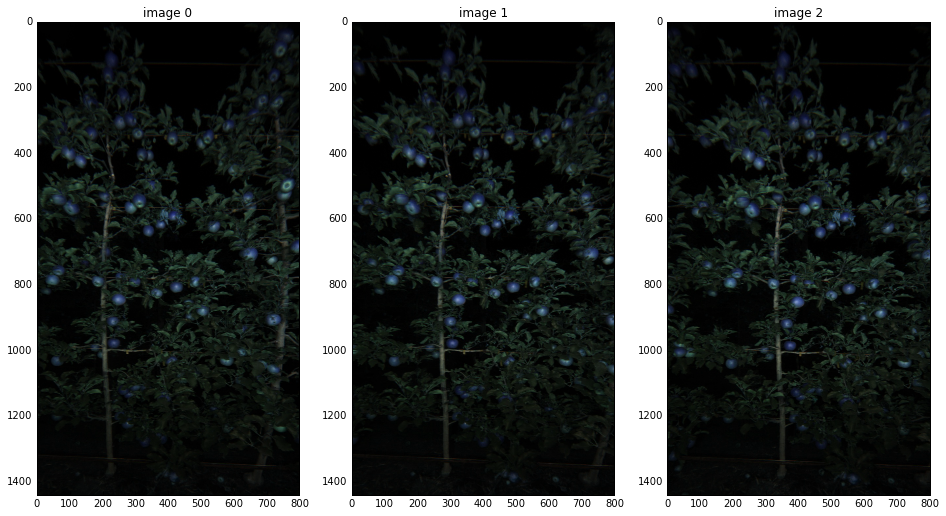

In [11]:
# Load n images
n = 3
images = []
for i in range(n):
    im = reader.read_image(i)
    im = rotate_image(im)
    im = im[:1440, 200:1000, :]
    images.append(im)

def plot_images(images):
    fig = plt.figure(figsize=(16, 9))
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(image)
        ax.set_title('image {0}'.format(i))

plot_images(images)

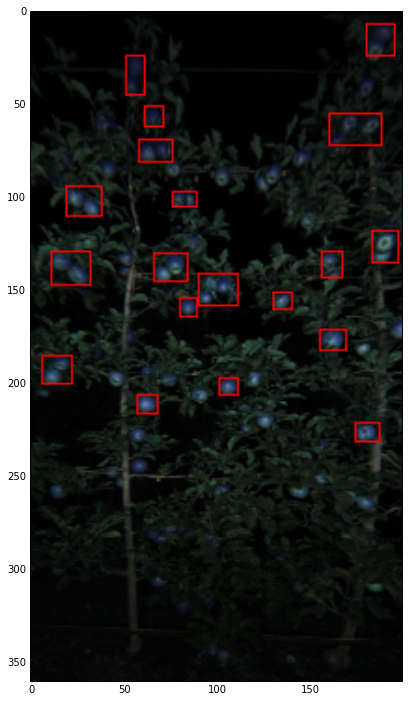

In [12]:
image = images[0]
s, bw = detector.detect(image)
blobs, bw = region_props(bw)
blobs = thresh_blobs_area(blobs)

tracker.track(s, blobs)
fig = plt.figure(figsize=(12, 12))
plt.imshow(tracker.disp)

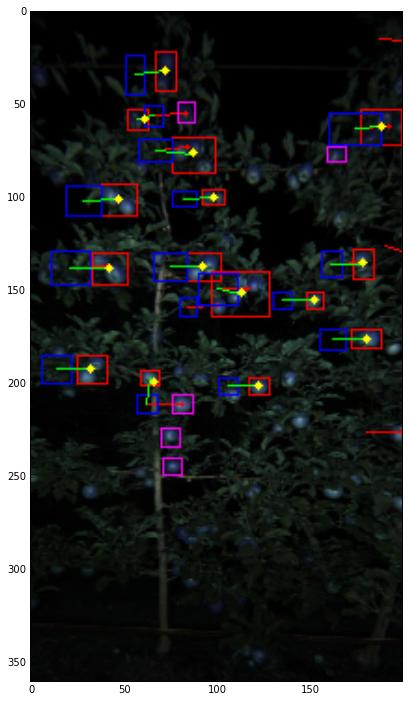

In [13]:
image = images[1]
s, bw = detector.detect(image)
blobs, bw = region_props(bw)
blobs = thresh_blobs_area(blobs)

tracker.track(s, blobs)
fig = plt.figure(figsize=(12, 12))
plt.imshow(tracker.disp)